In [431]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
from datetime import datetime
import math


In [36]:
def weatherdatafinder(StationID,startYear,endYear):
    
    data = pd.read_csv('https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={}&Year={}&timeframe=2&submit=Download+Data'.format(StationID,startYear))

    for year in range(startYear+1,endYear+1):
        URL = 'https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={}&Year={}&timeframe=2&submit=Download+Data'.format(StationID,year)

        a = pd.read_csv(URL)
        data = data.append(a, ignore_index=True)
        
    return data
    

In [38]:
data1 = weatherdatafinder(5415,1942,2012)

In [39]:
data2 = weatherdatafinder(30165,2013,2018)

In [40]:
fulldata = data1.append(data2,ignore_index=True)

In [262]:
list(fulldata)


['Longitude (x)',
 'Latitude (y)',
 'Station Name',
 'Climate ID',
 'Date/Time',
 'Year',
 'Month',
 'Day',
 'Data Quality',
 'Max Temp (\xc2\xb0C)',
 'Max Temp Flag',
 'Min Temp (\xc2\xb0C)',
 'Min Temp Flag',
 'Mean Temp (\xc2\xb0C)',
 'Mean Temp Flag',
 'Heat Deg Days (\xc2\xb0C)',
 'Heat Deg Days Flag',
 'Cool Deg Days (\xc2\xb0C)',
 'Cool Deg Days Flag',
 'Total Rain (mm)',
 'Total Rain Flag',
 'Total Snow (cm)',
 'Total Snow Flag',
 'Total Precip (mm)',
 'Total Precip Flag',
 'Snow on Grnd (cm)',
 'Snow on Grnd Flag',
 'Dir of Max Gust (10s deg)',
 'Dir of Max Gust Flag',
 'Spd of Max Gust (km/h)',
 'Spd of Max Gust Flag']

In [254]:
temps_only = fulldata.filter(['Year','Month','Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)'],axis=1)
temps_only


,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
0,1942,1,1,6.1,-7.8,-0.9
1,1942,1,2,6.7,-4.4,1.2
2,1942,1,3,-11.7,-16.7,-14.2
3,1942,1,4,-8.9,-13.3,-11.1
4,1942,1,5,-5.0,-12.8,-8.9
5,1942,1,6,-8.9,-17.8,-13.4
6,1942,1,7,-12.8,-21.7,-17.3
7,1942,1,8,-12.8,-25.6,-19.2
8,1942,1,9,-7.8,-24.4,-16.1
9,1942,1,10,-13.3,-23.9,-18.6


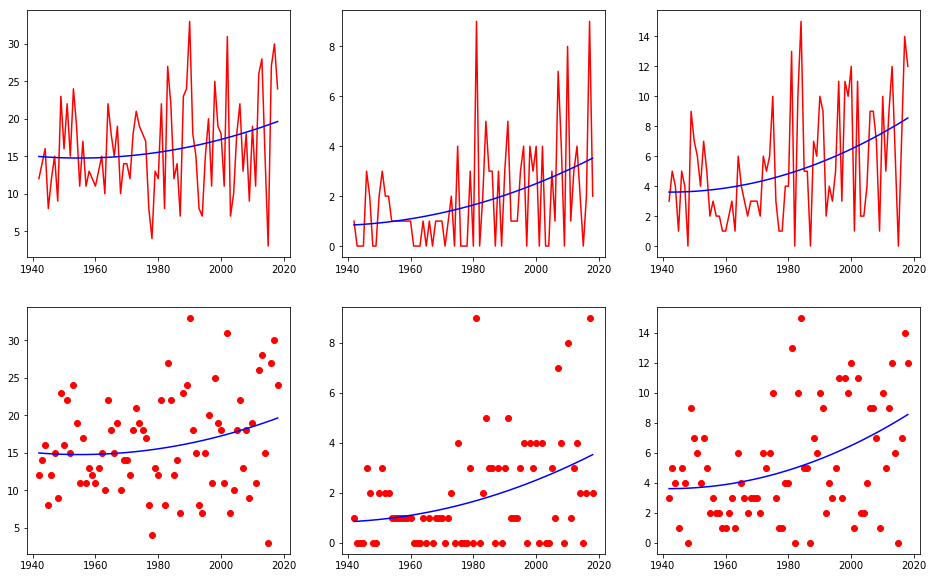

In [379]:
def add_years_with_zero(df,startYear,endYear):
    
    for i in range(startYear,endYear+1):
        if i in df.index:
            pass
        else:
            df.loc[i] = 0
            
            
    df.sort_index(inplace=True)

high_temps_in_winter = temps_only[(temps_only['Max Temp (°C)'] > 0) & (temps_only['Month'] < 3)]
high_temps_in_winter = high_temps_in_winter.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_temps_in_winter,1942,2018)
trend1 = np.polyfit(high_temps_in_winter.index,high_temps_in_winter['Day'],2)
trendy1 = np.poly1d(trend1)

high_mins_in_winter = temps_only[(temps_only['Min Temp (°C)'] > 0) & (temps_only['Month'] < 3)]
high_mins_in_winter = high_mins_in_winter.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_mins_in_winter,1942,2018)

trend2 = np.polyfit(high_mins_in_winter.index,high_mins_in_winter['Day'],2)
trendy2 = np.poly1d(trend2)

high_avgs_in_winter = temps_only[(temps_only['Mean Temp (°C)'] > 0) & (temps_only['Month'] < 3)]
high_avgs_in_winter = high_avgs_in_winter.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_avgs_in_winter,1942,2018)

trend3 = np.polyfit(high_avgs_in_winter.index,high_avgs_in_winter['Day'],2)
trendy3 = np.poly1d(trend3)


fig = plt.figure(figsize = (16,10))

plt.subplot(231)
plt.plot(high_temps_in_winter.index,high_temps_in_winter['Day'],'r-',high_temps_in_winter.index,trendy1(high_temps_in_winter.index),'b-')
plt.subplot(234)
plt.plot(high_temps_in_winter.index,high_temps_in_winter['Day'],'ro',high_temps_in_winter.index,trendy1(high_temps_in_winter.index),'b-')

plt.subplot(232)
plt.plot(high_mins_in_winter.index,high_mins_in_winter['Day'],'r-',high_mins_in_winter.index,trendy2(high_mins_in_winter.index),'b-')
plt.subplot(235)
plt.plot(high_mins_in_winter.index,high_mins_in_winter['Day'],'ro',high_mins_in_winter.index,trendy2(high_mins_in_winter.index),'b-')

plt.subplot(233)
plt.plot(high_avgs_in_winter.index,high_avgs_in_winter['Day'],'r-',high_avgs_in_winter.index,trendy3(high_avgs_in_winter.index),'b-')
plt.subplot(236)
plt.plot(high_avgs_in_winter.index,high_avgs_in_winter['Day'],'ro',high_avgs_in_winter.index,trendy3(high_avgs_in_winter.index),'b-')


In [161]:
def find_indian_summer(year,df,frostTemp,summerTemp):

    after_first_frost = df[(df['Year']==year) & (7<df['Month'])]
    frosts = after_first_frost[after_first_frost['Min Temp (°C)']<frostTemp]
    after_first_frost = after_first_frost.loc[frosts.index[0]:]
    print('first frost in {} was on {}/{}'.format(year,int(after_first_frost.iloc[0]['Month']),int(after_first_frost.iloc[0]['Day'])))

    indian_summer = after_first_frost[after_first_frost['Max Temp (°C)']>summerTemp]
    return indian_summer

find_indian_summer(2018,temps_only,0,19)

first frost in 2018 was on 10/22


,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)


In [160]:
def find_first_frost(year,df,frostTemp):
    after_first_frost = df[(df['Year']==year) & (7<df['Month'])]
    frosts = after_first_frost[after_first_frost['Min Temp (°C)']<frostTemp]
    first_frost = frosts.iloc[:1]
    return first_frost

find_first_frost(2018,temps_only,0)

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
28053,2018,10,22,6.8,-0.8,3.0


In [167]:
def first_frost_each_year(df,startYear,endYear,frostTemp):
    new_df = find_first_frost(startYear,df,frostTemp)
    for year in range(startYear+1,endYear+1):
        new_df = new_df.append(find_first_frost(year,df,frostTemp))
        
    return new_df



In [217]:
exp = first_frost_each_year(fulldata,1942,2018,0).filter(['Date/Time','Year','Month','Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)'],axis=1)
exp.set_index(['Year'],inplace=True)


exp

,Date/Time,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
Year,,,,,,
1942,1942-09-29,9,29,12.2,-1.7,5.3
1943,1943-09-26,9,26,14.4,-1.1,6.7
1944,1944-10-03,10,3,11.1,-1.7,4.7
1945,1945-09-30,9,30,10.0,-0.6,4.7
1946,1946-10-20,10,20,6.1,-4.4,0.9
1947,1947-09-26,9,26,10.6,-1.1,4.8
1948,1948-10-04,10,4,16.1,-0.6,7.8
1949,1949-10-24,10,24,7.2,-0.6,3.3
1950,1950-10-15,10,15,9.4,-1.1,4.2


Text(0.5,1,'Date of first frost each year')

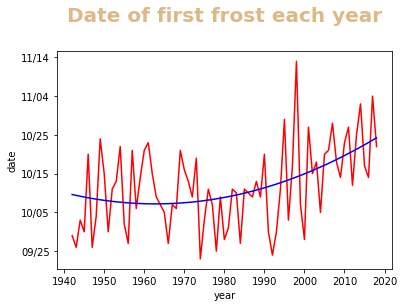

In [326]:


xaxis = exp.index
yaxis = [datetime.strptime(d, '%Y-%m-%d') for d in exp['Date/Time']]
yaxis = [a.replace(year=5678) for a in yaxis]
ax = plt.gca()
yaxis = dates.date2num(yaxis)    # Convert to maplotlib format
hfmt = dates.DateFormatter('%m/%d')
ax.yaxis.set_major_formatter(hfmt)

fftrend = np.polyfit(xaxis,yaxis,2)
fftrendy = np.poly1d(fftrend)

plt.plot(xaxis, yaxis,'r-',xaxis,fftrendy(xaxis),'b-')
plt.xlabel('year')
plt.ylabel('date')
plt.title('Date of first frost each year', color = 'burlywood', fontsize = 20, weight = 700,pad = 30.0)



In [451]:
avg_year_temps = temps_only.drop(['Month','Day'],axis=1).groupby('Year').mean()
avg_month_temps = temps_only.drop(['Day'],axis=1).groupby(['Year','Month']).mean()
avg_year_temps

,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
Year,,,
1942,11.724011,1.969859,6.783095
1943,9.891781,0.839560,5.384890
1944,11.281694,1.470604,6.426648
1945,11.019726,1.991713,6.566851
1946,11.889286,2.048626,6.983516
1947,10.977534,2.003014,6.496438
1948,11.825410,2.096721,6.970219
1949,12.370959,3.085479,7.740000
1950,10.734521,1.710685,6.232877


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 10: ordinal not in range(128)

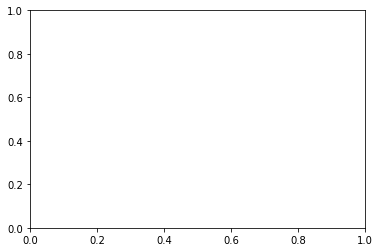

In [449]:
fig2 = plt.figure()

plt.plot(avg_year_temps.index,avg_year_temps['Max Temp (°C)'])

In [411]:
stations = pd.read_csv('/users/jonathancloutier/downloads/StationInventoryEN.csv')


In [421]:
sortedstations = stations.sort_values(['DLY Last Year','DLY First Year'],ascending=[False,True],axis = 0,)


In [423]:
sortedstations1 = stations.sort_values('DLY First Year',axis = 0,)


In [435]:
sortedstations

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
6129,WINDSOR RIVERSIDE,ONTARIO,6139520,4715,NaN,NaN,42.33,-82.93,422000000,-825600000,188.40,1866,2019,NaN,NaN,1866.0,2019.0,1866.0,2006.0
6291,BELLEVILLE,ONTARIO,6150689,4859,NaN,NaN,44.15,-77.39,440902052,-772341046,76.20,1866,2019,NaN,NaN,1866.0,2019.0,1866.0,2006.0
5951,KINCARDINE,ONTARIO,6124127,4575,NaN,NaN,44.17,-81.62,441022014,-813724042,200.00,1870,2019,NaN,NaN,1870.0,2019.0,1870.0,2006.0
6272,WOODSTOCK,ONTARIO,6149625,4835,NaN,NaN,43.14,-80.77,430810044,-804614040,281.90,1870,2019,NaN,NaN,1870.0,2019.0,1870.0,2006.0
7006,RICHMOND,QUEBEC,7026465,5440,NaN,NaN,45.63,-72.13,453800000,-720800000,123.10,1871,2019,NaN,NaN,1871.0,2019.0,1871.0,2018.0
6895,DANVILLE,QUEBEC,7021954,5345,NaN,NaN,45.82,-71.98,454900000,-715900000,190.00,1871,2019,NaN,NaN,1871.0,2019.0,1871.0,2018.0
3886,INDIAN HEAD CDA,SASKATCHEWAN,4013480,2925,71515.0,WBD,50.55,-103.65,503300000,-1033900000,579.10,1885,2019,1995.0,2019.0,1885.0,2019.0,1885.0,2007.0
4726,OAKBANK,MANITOBA,5022051,3641,NaN,NaN,49.93,-96.85,495600000,-965100000,245.60,1885,2019,NaN,NaN,1885.0,2019.0,1885.0,2007.0
4690,GRETNA (AUT),MANITOBA,5021220,3605,71441.0,WGN,49.03,-97.56,490151004,-973336003,252.60,1885,2019,1994.0,2019.0,1885.0,2019.0,1885.0,2007.0
8041,WOODSTOCK,NEW BRUNSWICK,8105600,6286,NaN,NaN,46.17,-67.55,461013000,-673313000,153.00,1886,2019,NaN,NaN,1886.0,2019.0,1886.0,2006.0


In [425]:
fulldataTOR = weatherdatafinder(5051,1840,2017)

In [433]:
fulldataTor = fulldataTOR[(fulldataTOR['Year'] > 1840) & (fulldataTOR['Year'] < 2017)&(np.isnan(fulldataTOR['Max Temp (°C)']) == False)]
                                                                                       

In [436]:
temps_onlyTOR = fulldataTor.filter(['Year','Month','Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)'],axis=1)


In [441]:
fulldataWIN = weatherdatafinder(4859,1867,2018)

In [445]:
temps_onlyWIN = fulldataWIN.filter(['Year','Month','Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)'],axis=1)
temps_onlyWIN = temps_onlyWIN[temps_onlyWIN['Year'] > 1924]

In [446]:
temps_onlyWIN

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
21184,1925,1,1,-12.8,-24.4,-18.6
21185,1925,1,2,-9.4,-17.2,-13.3
21186,1925,1,3,-0.6,-10.0,-5.3
21187,1925,1,4,0.6,-3.3,-1.4
21188,1925,1,5,-0.6,-4.4,-2.5
21189,1925,1,6,-2.8,-6.1,-4.5
21190,1925,1,7,0.0,-4.4,-2.2
21191,1925,1,8,2.2,-6.1,-2.0
21192,1925,1,9,-1.1,-11.7,-6.4
21193,1925,1,10,1.1,-12.2,-5.6


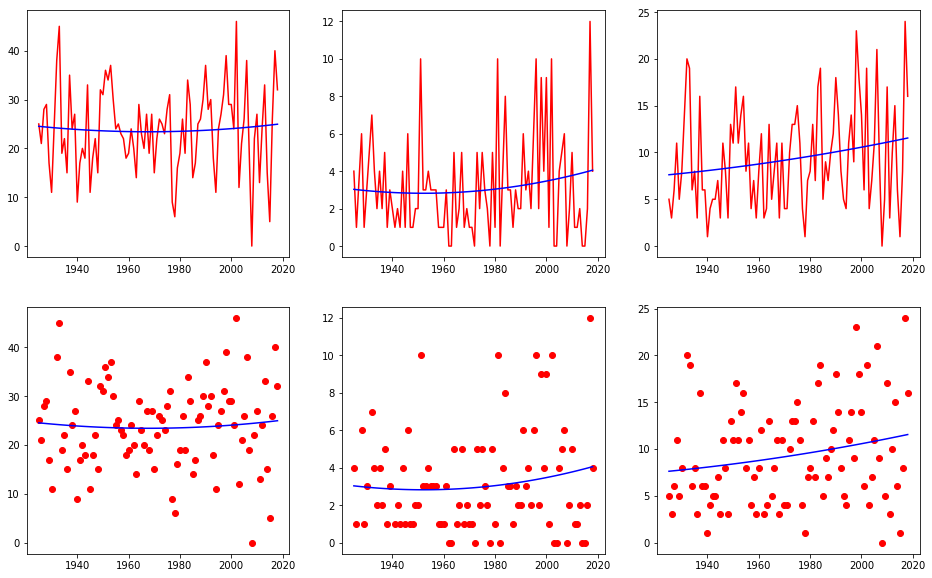

In [447]:
high_temps_in_winterWIN = temps_onlyWIN[(temps_onlyWIN['Max Temp (°C)'] > 0) & (temps_onlyWIN['Month'] < 3)]
high_temps_in_winterWIN = high_temps_in_winterWIN.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_temps_in_winterWIN,1942,2018)

trendWIN1 = np.polyfit(high_temps_in_winterWIN.index,high_temps_in_winterWIN['Day'],2)
trendyWIN1 = np.poly1d(trendWIN1)

high_mins_in_winterWIN = temps_onlyWIN[(temps_onlyWIN['Min Temp (°C)'] > 0) & (temps_onlyWIN['Month'] < 3)]
high_mins_in_winterWIN = high_mins_in_winterWIN.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_mins_in_winterWIN,1942,2018)

trendWIN2 = np.polyfit(high_mins_in_winterWIN.index,high_mins_in_winterWIN['Day'],2)
trendyWIN2 = np.poly1d(trendWIN2)

high_avgs_in_winterWIN = temps_onlyWIN[(temps_onlyWIN['Mean Temp (°C)'] > 0) & (temps_onlyWIN['Month'] < 3)]
high_avgs_in_winterWIN = high_avgs_in_winterWIN.filter(['Day','Year']).groupby('Year').count()
add_years_with_zero(high_avgs_in_winterWIN,1942,2018)

trendWIN3 = np.polyfit(high_avgs_in_winterWIN.index,high_avgs_in_winterWIN['Day'],2)
trendyWIN3 = np.poly1d(trendWIN3)


fig1 = plt.figure(figsize = (16,10))

plt.subplot(231)
plt.plot(high_temps_in_winterWIN.index,high_temps_in_winterWIN['Day'],'r-',high_temps_in_winterWIN.index,trendyWIN1(high_temps_in_winterWIN.index),'b-')
plt.subplot(234)
plt.plot(high_temps_in_winterWIN.index,high_temps_in_winterWIN['Day'],'ro',high_temps_in_winterWIN.index,trendyWIN1(high_temps_in_winterWIN.index),'b-')

plt.subplot(232)
plt.plot(high_mins_in_winterWIN.index,high_mins_in_winterWIN['Day'],'r-',high_mins_in_winterWIN.index,trendyWIN2(high_mins_in_winterWIN.index),'b-')
plt.subplot(235)
plt.plot(high_mins_in_winterWIN.index,high_mins_in_winterWIN['Day'],'ro',high_mins_in_winterWIN.index,trendyWIN2(high_mins_in_winterWIN.index),'b-')

plt.subplot(233)
plt.plot(high_avgs_in_winterWIN.index,high_avgs_in_winterWIN['Day'],'r-',high_avgs_in_winterWIN.index,trendyWIN3(high_avgs_in_winterWIN.index),'b-')
plt.subplot(236)
plt.plot(high_avgs_in_winterWIN.index,high_avgs_in_winterWIN['Day'],'ro',high_avgs_in_winterWIN.index,trendyWIN3(high_avgs_in_winterWIN.index),'b-')
